Our quest to understand natural world has come a long way. From ancient homonin populations who attributed everything to gods to a modern multi-faceted cooperative society which relies heavily on computation. But, we don't want to stop there, do we? How do we think, what kind of computation is behind our own thoughs? We don't know yet.

Most of the deep learning methods use computation especially matrix algebra. Learning and developing intuition behind matrices is very crucial to develop any machine learning or deep learning algorithms. So, we will start with basics of matrix algebra and start our journey. The good news is that most of these operations are efficiently implemented in various libraries like Numpy.

### Scalars, Vectors, Matrices and Tensors

** Scalar: ** Just a number, like the age of the universe or energy stored in a capacitor or number of words a book contains. No sense of direction.

** Vector: ** Array of numbers. We use a vector to identify a point in space (could be n-dimensional).

$$  y = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix} $$
         
Electormagnetic force is a vector, at each point in space the force will have a magnitude and a direction.

** Matrices **: 2-D array of numbers. You can use numpy to define, slice and extract elements from matrices.

In [1]:
import numpy as np
matrix = np.array([[1,2],[3,4]])

In [2]:
matrix

array([[1, 2],
       [3, 4]])

In [3]:
matrix[:,1]

array([2, 4])

In [4]:
matrix[1,:]

array([3, 4])

** Tensors: ** Generalization of matrices to more dimensions. Very critical in deep learning where most of the operations are minibatched, so you will have to deal with Tensors.

** Matrix Transpose: ** Let's see some examples of these operations in Images.

In [5]:
from skimage.io import imread, imshow
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
i = imread(urllib.urlopen('https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png?1486842310500')) 

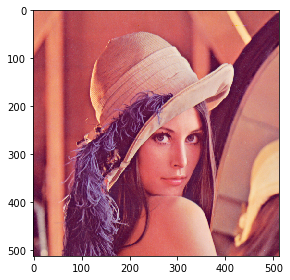

In [7]:
imshow(i) 

The Image is stored as an n-dimensional array inside memory.

In [8]:
i

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ..., 
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ..., 
       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ..., 
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ..., 
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ..., 
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,

Matrix Transpose interchanges axis, so on Images, it performs a rotation operation.

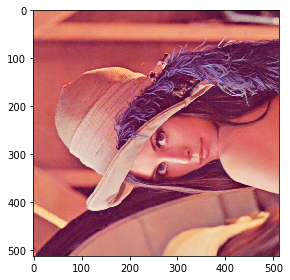

In [9]:
imshow(i.transpose((1,0,2))) 

### Matrix Multiplication

Multiplication of two matrices A and B is defined only when number of columns in A match with number of rows in B. Let's create two matrices A and B.

In [10]:
A = np.array([[1,2],[3,4]]) 

In [11]:
B = np.array([[2,3],[4,5]]) 

In [12]:
A.dot(B) 

array([[10, 13],
       [22, 29]])

The elementwise product or Hadamard product is a naive multiplication. You can think of it as a scaling that is applied to in all directions(?).

In [14]:
A * B

array([[ 2,  6],
       [12, 20]])

What if we do the same thing on an image? 

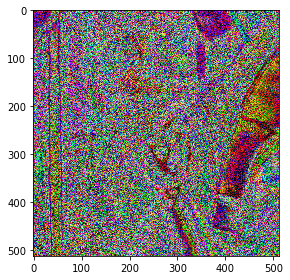

In [24]:
imshow(i * i)

We can't see what it is exactly doing. On Images, Hadamard product with a particular definition could be used as a filter in spatial domain. I'm just showing an example here, but more things could be accomplished by using direct products.

/home/sandeep/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


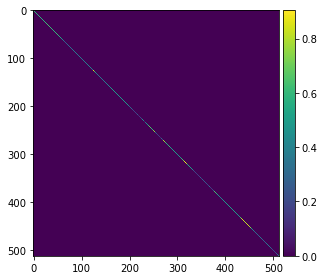

In [63]:
imshow(np.identity(512) * i_gray)

### Matrix Multiplication Properties

* Distributive

$$ A(B+C) = AB + AC $$

* Associative

$$ A(BC) = (AB)C $$

* ** Not Commutative ** 

$$ AB \ne BA $$

* Transpose 

$$ {(AB)}^T = B^T  A^T $$



In [68]:
matrix.dot(matrix).transpose()

array([[ 7, 15],
       [10, 22]])

In [69]:
(matrix.transpose()).dot(matrix.transpose())

array([[ 7, 15],
       [10, 22]])

### Matrix Inversion

$$ Ax = B $$

$$ A^{-1} A x = A^{-1} B $$

$$ I_{n} x = A^{-1} B $$

$$ x = A^{-1} B $$

** When does the inverse exist? **

* A system of equations can have multiple solutions or infinite solutions, consider x-y = 0 for example.
* You can think of solving $ Ax = B$ as an operation that takes a vector x, performs a transformation using A (could be rotation or scaling) to make it equal to B.
* There is a concept called 'span', this is the set of all the vectors which can be expressed as a linear combination of original vectors (think of unit vectors for $ x, y, z$, they span the entire euclidian space, this is just another way of saying that any vector in euclidian space can be represented as a linear combination of these unit vectors).
* There is one more concept that is very crucial to understand called linear independence. A set of vectors is linearly independent if no vector in that set can be expressed as a linear combination of others.
* In order for the solution to exist, we can't afford to have more parameters than equations. This condition is necessary but not sufficient.
* In addition to that, the matrix A needs to represent a linearly independent set of vectors. This happens when A is singular.

### Norms

* How to measure the length of a vector? 
* $L^p norm: (\sum_{i}|x|_{i}^p)^{(1/p)}$
* $L^0 norm$: Sum of modulus of all elements of a vector, used when difference between zero and non-zero elements becomes important.

### Special Vectors and Matrices

* ** Diagonal Matrix: ** $ D_{(i,j)} = 0 $ when $ i \ne j $, can be understood as an operation that scales each element of a vector with a different scaling value.
* ** Symmetric Matrix: ** $ A^T = A $, generated by function in which order does not matter
* ** Orthogonal Matrix: ** $ A^T A = A A^T = I \implies A^{-1} = A^T $

### Eigen-decomposition

* Like in a democratic society where we allow multiple viewpoints, there could be different ways to represent a matrix. This way of decomposing matrices into combinations of vectors or operations on other matrices would allow us to look at information in an unique angle that could be useful in solving a problem.
* One of such frequently used decomposition is called eigen decomposition. This is one of such concepts which looks clear when studied but somehow fails to give enough intuition when it's applied somewhere else.
* For a give matrix 'A', the goal of eigen decomposition is to find two things: a set of eigen vectors and set of eigen values. There are some vectors on which if you apply the operation 'A', it will just scale the vector with a particular value. This vector is called the eigen vector and the scaling is called the eigen value. Mathematically, it is quite a simple thing to write.

$$ Av = \lambda v $$
* You might wonder what's the practical use of this system, what makes them better? They make the computation cheaper is one thing. The other intricate fact is related to how dynamic systems evolve in nature. If you have a system that is evolving in time, eigen values and vectors give the evolution dynamics of the system. If you repeatedly apply the same operation A on v, you get new possible states like $ \lambda v $, ${\lambda}^2 v$.
* A can be represented as eigen decomposition of eigen vectors and eigen values.

$$ A = V diag(\lambda) V^{-1} $$

### Singular value decomposition

* Eigenvalue decomposition is not defined for non-square matrices. SVD is more generally applicable.
 $$ A = UDV^T $$
* diag(D) are called singular values, U and V are orthogonal vectors.

### Decomposing images

In [94]:
from skimage.color import rgb2grey
from scipy.linalg import svd, diagsvd

In [88]:
i_gray = rgb2grey(i)

In [89]:
i_gray

array([[ 0.60802863,  0.60802863,  0.60779059, ...,  0.64137412,
         0.57998235,  0.46985725],
       [ 0.60802863,  0.60802863,  0.60779059, ...,  0.64137412,
         0.57998235,  0.46985725],
       [ 0.60802863,  0.60802863,  0.60779059, ...,  0.64137412,
         0.57998235,  0.46985725],
       ..., 
       [ 0.13746353,  0.13746353,  0.16881412, ...,  0.37271804,
         0.35559529,  0.34377725],
       [ 0.14617059,  0.14617059,  0.18730588, ...,  0.36788784,
         0.37292549,  0.38467529],
       [ 0.14617059,  0.14617059,  0.18730588, ...,  0.36788784,
         0.37292549,  0.38467529]])

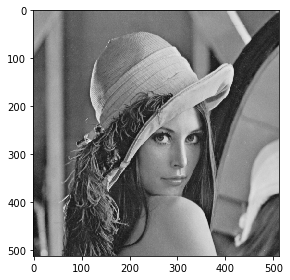

In [90]:
imshow(i_gray)

In [91]:
u,d,v = svd(i_gray)

In [76]:
u.shape

(512, 512)

In [77]:
d.shape

(512,)

In [78]:
v.shape

(512, 512)

In [96]:
D = diagsvd(d, 512, 512)

Using full decompositon to get the representation back to the image

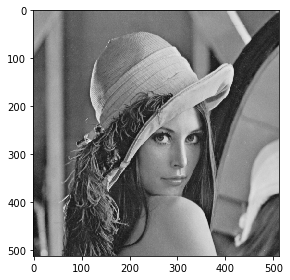

In [98]:
imshow(np.dot(u, np.dot(D, v)))

Now, we will use the decomposed matrices to keep only few components and print image at each step.

In [165]:
import matplotlib.gridspec as gridspec

In [178]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]),cmap='gray')
    return 

In [185]:
images = []
D = diagsvd(d, 512, 512)
val = np.linspace(0,512,512/32)
val = [int(x) for x in val]
for x in val:
#     print 'Image at SVD@%d components' %(x)
    images.append((np.dot(u[:,:x], np.dot(D[:x,:x], v[:x,:]))))

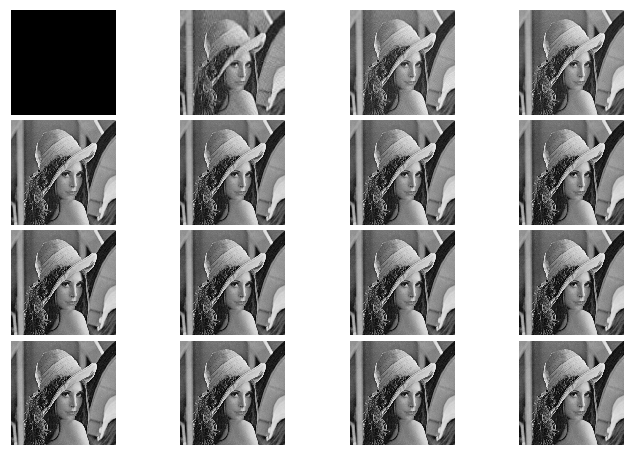

In [186]:
show_images(np.array(images))